In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [2]:
bcw = pd.read_csv('./datasets/wdbc.data', header=None, index_col=None)

In [3]:
bcw.head()

,0,1,2,3,4,5,6,7,8,9,...,22,23,24,25,26,27,28,29,30,31
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [6]:
column_names = ['id','malignant',
                'nucleus_mean','nucleus_se','nucleus_worst',
                'texture_mean','texture_se','texture_worst',
                'perimeter_mean','perimeter_se','perimeter_worst',
                'area_mean','area_se','area_worst',
                'smoothness_mean','smoothness_se','smoothness_worst',
                'compactness_mean','compactness_se','compactness_worst',
                'concavity_mean','concavity_se','concavity_worst',
                'concave_pts_mean','concave_pts_se','concave_pts_worst',
                'symmetry_mean','symmetry_se','symmetry_worst',
                'fractal_dim_mean','fractal_dim_se','fractal_dim_worst']


In [10]:
bcw.columns = column_names

In [11]:
bcw.head()

,id,malignant,nucleus_mean,nucleus_se,nucleus_worst,texture_mean,texture_se,texture_worst,perimeter_mean,perimeter_se,...,concavity_worst,concave_pts_mean,concave_pts_se,concave_pts_worst,symmetry_mean,symmetry_se,symmetry_worst,fractal_dim_mean,fractal_dim_se,fractal_dim_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [12]:
bcw.dtypes

id                     int64
malignant             object
nucleus_mean         float64
nucleus_se           float64
nucleus_worst        float64
texture_mean         float64
texture_se           float64
texture_worst        float64
perimeter_mean       float64
perimeter_se         float64
perimeter_worst      float64
area_mean            float64
area_se              float64
area_worst           float64
smoothness_mean      float64
smoothness_se        float64
smoothness_worst     float64
compactness_mean     float64
compactness_se       float64
compactness_worst    float64
concavity_mean       float64
concavity_se         float64
concavity_worst      float64
concave_pts_mean     float64
concave_pts_se       float64
concave_pts_worst    float64
symmetry_mean        float64
symmetry_se          float64
symmetry_worst       float64
fractal_dim_mean     float64
fractal_dim_se       float64
fractal_dim_worst    float64
dtype: object

In [14]:
bcw = bcw[[c for c in bcw.columns if not '_worst' in c and not '_se' in c]]

In [15]:
bcw.head()

,id,malignant,nucleus_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_pts_mean,symmetry_mean,fractal_dim_mean
0,842302,M,17.99,1001.0,0.3001,0.07871,8.589,0.04904,0.03003,17.33,0.1622,0.2654
1,842517,M,20.57,1326.0,0.0869,0.05667,3.398,0.01308,0.01389,23.41,0.1238,0.1860
2,84300903,M,19.69,1203.0,0.1974,0.05999,4.585,0.04006,0.02250,25.53,0.1444,0.2430
3,84348301,M,11.42,386.1,0.2414,0.09744,3.445,0.07458,0.05963,26.50,0.2098,0.2575
4,84358402,M,20.29,1297.0,0.1980,0.05883,5.438,0.02461,0.01756,16.67,0.1374,0.1625


In [16]:
bcw['malignant'] = bcw['malignant'].map(lambda x: 1 if x == 'M' else 0)

In [21]:
print(bcw['malignant'].value_counts())

0    357
1    212
Name: malignant, dtype: int64


In [23]:
bcw.head()

,id,malignant,nucleus_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_pts_mean,symmetry_mean,fractal_dim_mean
0,842302,1,17.99,1001.0,0.3001,0.07871,8.589,0.04904,0.03003,17.33,0.1622,0.2654
1,842517,1,20.57,1326.0,0.0869,0.05667,3.398,0.01308,0.01389,23.41,0.1238,0.1860
2,84300903,1,19.69,1203.0,0.1974,0.05999,4.585,0.04006,0.02250,25.53,0.1444,0.2430
3,84348301,1,11.42,386.1,0.2414,0.09744,3.445,0.07458,0.05963,26.50,0.2098,0.2575
4,84358402,1,20.29,1297.0,0.1980,0.05883,5.438,0.02461,0.01756,16.67,0.1374,0.1625


In [24]:
bcw1 = bcw.copy()

In [25]:
mean_corr = bcw.drop('id', axis=1).corr()

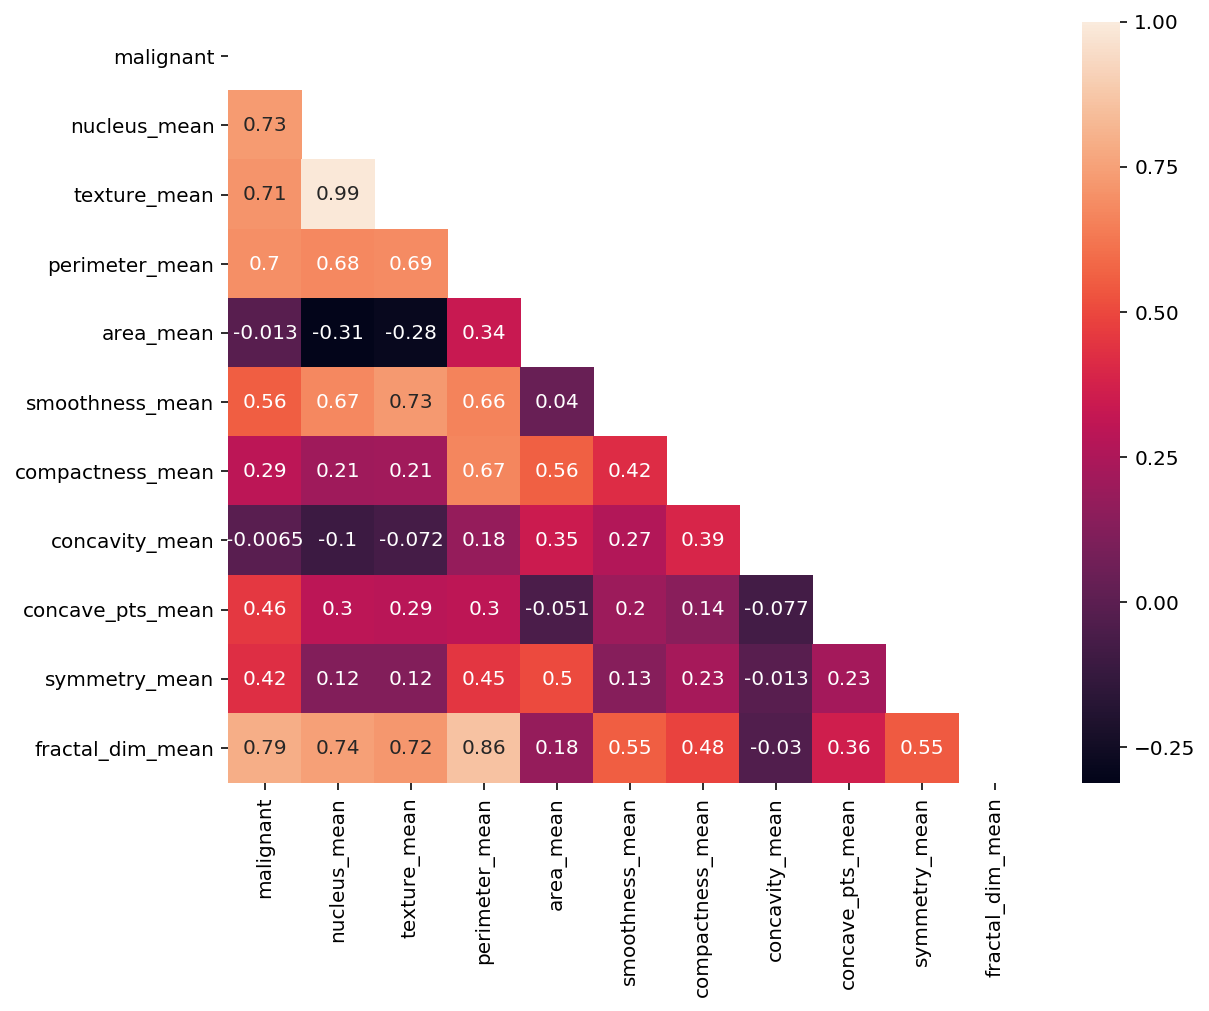

In [29]:
fig, ax = plt.subplots(figsize=(9,7))

mask = np.zeros_like(mean_corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

sns.heatmap(mean_corr, annot=True, mask=mask, ax=ax)
plt.show()

In [30]:
from sklearn.model_selection import StratifiedKFold
from sklearn.neighbors import KNeighborsClassifier

In [31]:
bcw.columns

Index(['id', 'malignant', 'nucleus_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave_pts_mean', 'symmetry_mean', 'fractal_dim_mean'],
      dtype='object')

In [53]:
y = bcw['malignant'].values
X = bcw[['nucleus_mean', 'texture_mean', 'perimeter_mean']]

In [39]:
y

array([[1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [1],
       [0],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [1],
    

In [54]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
Xs = ss.fit_transform(X)

In [55]:
skf = StratifiedKFold(n_splits=5)
cv_indices = skf.split(Xs, y)
cv_indices = [[tr,te] for tr, te in cv_indices]

In [56]:
from sklearn.model_selection import train_test_split

In [62]:
X_train, X_test, y_train, y_test = train_test_split(Xs, y, test_size=0.33)

In [63]:
knn = KNeighborsClassifier()

In [64]:
knn.fit(X_train, y_train)
acc = knn.score(X_train, y_train)

In [65]:
acc

0.93963254593175849

In [66]:
knn.score(X_test, y_test)

0.90957446808510634

In [68]:
knn10 = KNeighborsClassifier(n_neighbors=10)
knn10.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=10, p=2,
           weights='uniform')

In [69]:
knn10.score(X_train, y_train)

0.92913385826771655

In [70]:
knn10.score(X_test, y_test)

0.89893617021276595

In [72]:
knn20 = KNeighborsClassifier(n_neighbors=20)
knn20.fit(X_train, y_train)
knn20.score(X_train, y_train)

0.9186351706036745

In [73]:
knn20.score(X_test, y_test)

0.88297872340425532

In [74]:
knn50 = KNeighborsClassifier(n_neighbors=50)
knn50.fit(X_train, y_train)
knn50.score(X_train, y_train)

0.92125984251968507

In [76]:
knn50.score(X_test, y_test)

0.89893617021276595

In [77]:
knn1 = KNeighborsClassifier(n_neighbors=1)
knn1.fit(X_train, y_train)
knn1.score(X_train, y_train)

1.0

In [78]:
knn1.score(X_test, y_test)

0.87765957446808507

In [79]:
import statsmodels.formula.api as sm
target = ['malignant']
features = ['nucleus_mean','texture_mean','perimeter_mean']
X = bcw[features]
X = X - X.mean()
X = pd.concat([X, bcw[target]], axis=1)
formula = 'malignant ~ nucleus_mean + texture_mean + perimeter_mean'

model = sm.logit(formula, data=X).fit()
model.summary()

Optimization terminated successfully.
         Current function value: 0.201988
         Iterations 9


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              malignant   No. Observations:                  569
Model:                          Logit   Df Residuals:                      565
Method:                           MLE   Df Model:                            3
Date:                Tue, 31 Oct 2017   Pseudo R-squ.:                  0.6941
Time:                        22:46:44   Log-Likelihood:                -114.93
converged:                       True   LL-Null:                       -375.72
                                        LLR p-value:                1.005e-112
==================================================================================
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept         -0.2237      0.396     -0.565      0.572      -1.000       0.552
nucleus_mean      -0.0333      0.981     -0.034      0.973      -1.955       1.889
texture_mean       0.0110      0.011      0.978      0.328      -0.011       0.033
perimeter_mean    26.7535      3.460      7.731      0.000      19.971      33.536
==================================================================================
"""